In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [18]:
df=pd.read_csv('https://raw.githubusercontent.com/anujvyas/Restaurant-Reviews-Sentiment-Analysis-Deployment/master/Restaurant_Reviews.tsv',delimiter='\t',quoting=3)

In [19]:
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [20]:
df.shape

(1000, 2)

In [21]:
df.columns

Index(['Review', 'Liked'], dtype='object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [23]:
# 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
import string
from nltk.stem import WordNetLemmatizer,PorterStemmer

In [24]:
lemma=WordNetLemmatizer()

In [25]:
port=PorterStemmer()

In [26]:
df['Liked'].value_counts()

0    500
1    500
Name: Liked, dtype: int64

In [27]:
df['length']=df.Review.str.len()

In [28]:
df

,Review,Liked,length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59
...,...,...,...
995,I think food should have flavor and texture an...,0,66
996,Appetite instantly gone.,0,24
997,Overall I was not impressed and would not go b...,0,50
998,"The whole experience was underwhelming, and I ...",0,91


In [29]:
df['Review'][0]

'Wow... Loved this place.'

In [30]:
# convert to lower case
df['Review']=df['Review'].str.lower()

In [31]:
# remove puntuation 
df['Review']=df['Review'].str.replace(r'[^\w\d\s\+?]',' ')

In [32]:
# remove regular expression
df['Review']=df['Review'].str.replace('[^a-zA-Z]',' ')

In [33]:
# remove stop words
df['Review']=df['Review'].apply(lambda x:' '.join(word for word in x.split() if word not in set(stopwords.words('english'))))

In [34]:
# apply stemming technique 
df['Review']=df['Review'].apply(lambda x: ' '.join(lemma.lemmatize(word) for word in x.split()))

In [35]:
df['length']=df.Review.str.len()

In [36]:
# clean data set 
df

,Review,Liked,length
0,wow loved place,1,15
1,crust good,0,10
2,tasty texture nasty,0,19
3,stopped late may bank holiday rick steve recom...,1,61
4,selection menu great price,1,26
...,...,...,...
995,think food flavor texture lacking,0,33
996,appetite instantly gone,0,23
997,overall impressed would go back,0,31
998,whole experience underwhelming think go ninja ...,0,61


In [54]:
df['Review'][850]

'potato great biscuit'

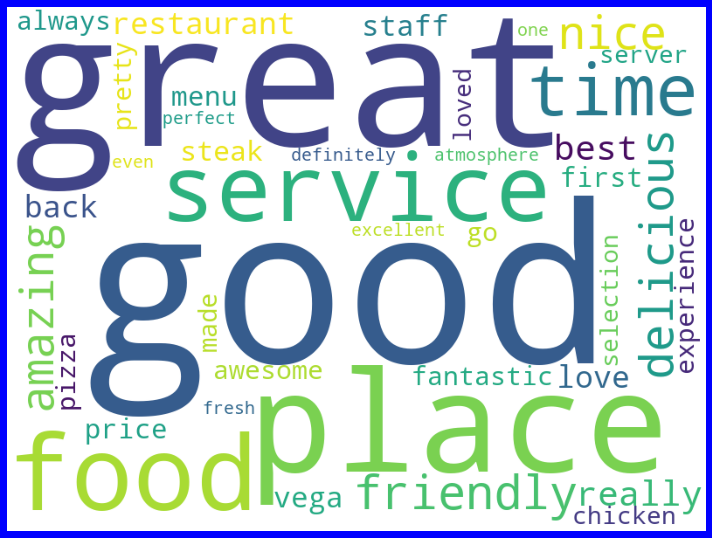

In [37]:
# positive review words cloud
from wordcloud import WordCloud
positive=df['Review'][df['Liked']==1]
positive_cloud=WordCloud(width=800,height=600,background_color='white',max_words=40).generate(' '.join(positive))
plt.figure(figsize=(10,8),facecolor='blue')
plt.imshow(positive_cloud)
plt.axis('off')
plt.tight_layout()
plt.show()

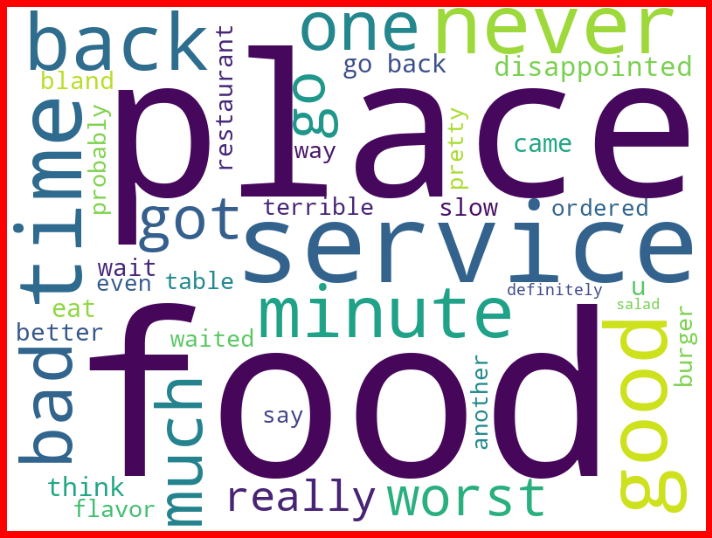

In [38]:
# negative review words cloud
negative=df['Review'][df['Liked']==0]
negative_cloud=WordCloud(width=800,height=600,background_color='white',max_words=40).generate(' '.join(negative))
plt.figure(figsize=(10,8),facecolor='r')
plt.axis('off')
plt.imshow(negative_cloud)
plt.tight_layout()
plt.show()

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [40]:
# tfidf and count vectorizer methods
tfd=TfidfVectorizer()
cv=CountVectorizer()
naive=MultinomialNB()
features=tfd.fit_transform(df['Review'])
x1=features
y1=df['Liked']

In [41]:
feat=cv.fit_transform(df['Review'])
x=feat
y=df['Liked']

In [42]:
# naive bayes mutinomial classifier by count-vectorizer
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30)
naive.fit(x_train,y_train)
y_pred=naive.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.7366666666666667


In [43]:
print('Classification report =>\n',classification_report(y_test,y_pred))
print('confusion matrix =>\n',confusion_matrix(y_test,y_pred))

Classification report =>
               precision    recall  f1-score   support

           0       0.76      0.71      0.73       153
           1       0.72      0.76      0.74       147

    accuracy                           0.74       300
   macro avg       0.74      0.74      0.74       300
weighted avg       0.74      0.74      0.74       300

confusion matrix =>
 [[109  44]
 [ 35 112]]


In [44]:
# naive bayes multinomial classifier by tfidf algorithm
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.30,random_state=3)
naive.fit(x_train,y_train)
y_pred=naive.predict(x_test)
print('accuracy score =>\n',accuracy_score(y_test,y_pred))

accuracy score =>
 0.7766666666666666


In [45]:
print('Classification report =>\n',classification_report(y_test,y_pred))
print('confusion matrix =>\n',confusion_matrix(y_test,y_pred))

Classification report =>
               precision    recall  f1-score   support

           0       0.70      0.85      0.77       130
           1       0.86      0.72      0.79       170

    accuracy                           0.78       300
   macro avg       0.78      0.78      0.78       300
weighted avg       0.79      0.78      0.78       300

confusion matrix =>
 [[110  20]
 [ 47 123]]


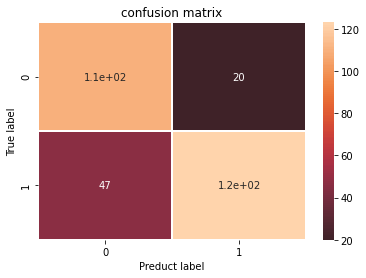

In [46]:
conf_matx=confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matx,annot=True,linewidth=.5,linecolor='white',center=0)
plt.xlabel('Preduct label')
plt.ylabel('True label')
plt.title('confusion matrix')
plt.show()

In [47]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [48]:
# decision tree classifiers
dtc.fit(x_train,y_train)
pred_dtc=dtc.predict(x_test)
print(accuracy_score(y_test,pred_dtc))
print('Classification report =>\n',classification_report(y_test,pred_dtc))
print('confusion matrix =>\n',confusion_matrix(y_test,pred_dtc))

0.68
Classification report =>
               precision    recall  f1-score   support

           0       0.60      0.79      0.68       130
           1       0.79      0.59      0.68       170

    accuracy                           0.68       300
   macro avg       0.69      0.69      0.68       300
weighted avg       0.71      0.68      0.68       300

confusion matrix =>
 [[103  27]
 [ 69 101]]


In [49]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42)
rf.fit(x_train,y_train)
pred_rf=rf.predict(x_test)
print(accuracy_score(y_test,pred_rf))
print('Classification report =>\n',classification_report(y_test,pred_rf))
print('confusion matrix =>\n',confusion_matrix(y_test,pred_rf))

0.6966666666666667
Classification report =>
               precision    recall  f1-score   support

           0       0.60      0.88      0.71       130
           1       0.86      0.56      0.68       170

    accuracy                           0.70       300
   macro avg       0.73      0.72      0.70       300
weighted avg       0.75      0.70      0.69       300

confusion matrix =>
 [[114  16]
 [ 75  95]]
